In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=908a669bcfb3a09defdb9398c1514c3f


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | brodokalmak
Processing Record 2 of Set 13 | atuona
Processing Record 3 of Set 13 | stornoway
Processing Record 4 of Set 13 | seymchan
Processing Record 5 of Set 13 | barrow
Processing Record 6 of Set 13 | katsuura
Processing Record 7 of Set 13 | busselton
Processing Record 8 of Set 13 | port-cartier
Processing Record 9 of Set 13 | viransehir
Processing Record 10 of Set 13 | fort nelson
Processing Record 11 of Set 13 | takoradi
Processing Record 12 of Set 13 | morehead
Processing Record 13 of Set 13 | georgetown
Processing Record 14 of Set 13 | yellowknife
Processing Record 15 of Set 13 | arraial do cabo
Processing Record 16 of Set 13 | chokurdakh
Processing Record 17 of Set 13 | flinders
Processing Record 18 of Set 13 | paoua
Processing Record 19 of Set 13 | nikolskoye
Processing Record 20 of Set 13 | ushuaia
Processing Record 21 of Set 13 | abu dhabi
Processing Record 22 of Set 13 | sitka
Proce

Processing Record 30 of Set 16 | klaksvik
Processing Record 31 of Set 16 | nizhneyansk
City not found. Skipping...
Processing Record 32 of Set 16 | pangody
Processing Record 33 of Set 16 | plettenberg bay
Processing Record 34 of Set 16 | mendi
Processing Record 35 of Set 16 | cherskiy
Processing Record 36 of Set 16 | yeppoon
Processing Record 37 of Set 16 | grindavik
Processing Record 38 of Set 16 | upernavik
Processing Record 39 of Set 16 | corowa
Processing Record 40 of Set 16 | maceio
Processing Record 41 of Set 16 | gizo
Processing Record 42 of Set 16 | avigliano
Processing Record 43 of Set 16 | amapa
Processing Record 44 of Set 16 | baykit
Processing Record 45 of Set 16 | sentyabrskiy
City not found. Skipping...
Processing Record 46 of Set 16 | airai
Processing Record 47 of Set 16 | murdochville
Processing Record 48 of Set 16 | manado
Processing Record 49 of Set 16 | kirillov
Processing Record 50 of Set 16 | nanortalik
Processing Record 1 of Set 17 | san patricio
Processing Record

Processing Record 20 of Set 20 | barranca
Processing Record 21 of Set 20 | zeya
Processing Record 22 of Set 20 | kruisfontein
Processing Record 23 of Set 20 | half moon bay
Processing Record 24 of Set 20 | waipawa
Processing Record 25 of Set 20 | nouakchott
Processing Record 26 of Set 20 | yerbogachen
Processing Record 27 of Set 20 | qandahar
City not found. Skipping...
Processing Record 28 of Set 20 | sao gabriel da cachoeira
Processing Record 29 of Set 20 | kilindoni
Processing Record 30 of Set 20 | nyuksenitsa
Processing Record 31 of Set 20 | geraldton
Processing Record 32 of Set 20 | merritt island
Processing Record 33 of Set 20 | labuan
Processing Record 34 of Set 20 | impfondo
Processing Record 35 of Set 20 | sehithwa
Processing Record 36 of Set 20 | gamba
Processing Record 37 of Set 20 | solnechnyy
Processing Record 38 of Set 20 | bambous virieux
Processing Record 39 of Set 20 | gilgit
Processing Record 40 of Set 20 | pevek
Processing Record 41 of Set 20 | isangel
Processing Rec

Processing Record 7 of Set 24 | lisakovsk
Processing Record 8 of Set 24 | clarksville
Processing Record 9 of Set 24 | rorvik
Processing Record 10 of Set 24 | san juan del sur
Processing Record 11 of Set 24 | avera
Processing Record 12 of Set 24 | wakkanai
Processing Record 13 of Set 24 | las varas
Processing Record 14 of Set 24 | wattegama
Processing Record 15 of Set 24 | westport
Processing Record 16 of Set 24 | kazanskaya
Processing Record 17 of Set 24 | mashhad
Processing Record 18 of Set 24 | kaitangata
Processing Record 19 of Set 24 | tumsar
Processing Record 20 of Set 24 | roros
Processing Record 21 of Set 24 | mehran
Processing Record 22 of Set 24 | canberra
Processing Record 23 of Set 24 | alta floresta
Processing Record 24 of Set 24 | maragogi
Processing Record 25 of Set 24 | amderma
City not found. Skipping...
Processing Record 26 of Set 24 | naze
Processing Record 27 of Set 24 | san cristobal acasaguastlan
Processing Record 28 of Set 24 | baker city
Processing Record 29 of S

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Brodokalmak,55.5748,62.0820,61.70,84,99,5.99,RU,2021-09-15 18:29:53
1,Atuona,-9.8000,-139.0333,77.95,74,32,25.01,PF,2021-09-15 18:29:53
2,Stornoway,58.2093,-6.3865,58.93,94,75,4.61,GB,2021-09-15 18:29:53
3,Seymchan,62.8833,152.4333,45.03,73,100,7.58,RU,2021-09-15 18:29:54
4,Barrow,71.2906,-156.7887,37.42,87,90,8.05,US,2021-09-15 18:29:54
5,Katsuura,35.1333,140.3000,71.71,85,25,14.58,JP,2021-09-15 18:29:55
6,Busselton,-33.6500,115.3333,52.09,77,76,21.00,AU,2021-09-15 18:29:55
7,Port-Cartier,50.0334,-66.8654,52.02,98,100,6.42,CA,2021-09-15 18:29:55
8,Viransehir,37.2353,39.7631,78.82,33,0,7.87,TR,2021-09-15 18:29:56
9,Fort Nelson,58.8053,-122.7002,42.39,87,90,13.80,CA,2021-09-15 18:29:56


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/cities.csv'

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig1.png'

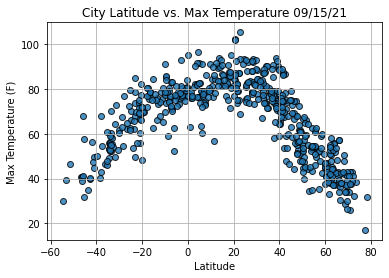

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

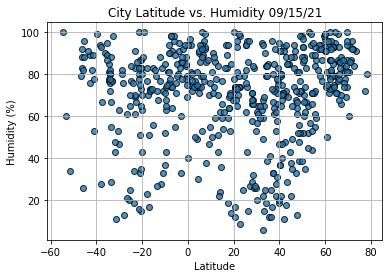

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()

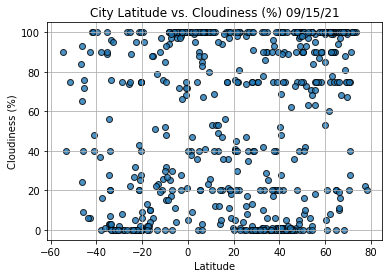

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()

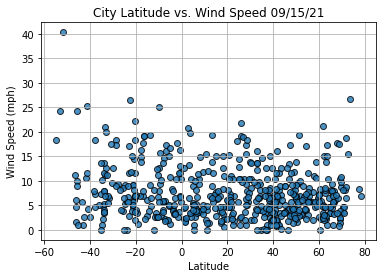

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()